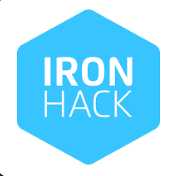

<h1 style="color: saddlebrown;">Final Project</h1>

<h1 style="color: sandybrown;">00 | Data cleaning and preparation </h1>

In [4]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones mathematics
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objs as go

# 🔢 stats
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import kruskal
from scipy.stats import shapiro, normaltest

import scipy.stats as st 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# 🤖🎓 ML training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 

#⚖️ ML normalizing features
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import category_encoders as ce

# 📐 Ml reporting metrics
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# 🤖 NLP Libraries
import nltk # natural language toolkit
from nltk.sentiment import SentimentIntensityAnalyzer #vader sentiment analysis
import tensorflow as tf #RoBERTa
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification # sequence classification

In [5]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

nltk.download('vader_lexicon')
tf.keras.losses.SparseCategoricalCrossentropy()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x000001FC2907F380>, kwargs={'from_logits': False, 'ignore_class': None})>

<h1 style="color: sandybrown;">01 | Data Extraction</h1>

In [7]:
df_info=pd.read_csv("product_info.csv")
df_info.head(3)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [8]:
#5 review dataframe
df_r1=pd.read_csv("reviews_0-250.csv",index_col=0)
df_r2=pd.read_csv("reviews_250-500.csv", index_col=0)
df_r3=pd.read_csv("reviews_500-750.csv", index_col=0)
df_r4=pd.read_csv("reviews_750-1250.csv", index_col=0)
df_r5=pd.read_csv("reviews_1250-end.csv", index_col=0)

In [9]:
# Concatenate all review dataframes
df_reviews = pd.concat([df_r1, df_r2, df_r3, df_r4, df_r5], ignore_index=True)
df_reviews. head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [10]:
# mergre product info dataset and all reviews dataset
df_merged = df_reviews.merge(df_info, on="product_id", how="inner")
df_merged.head(3)

,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name_x,brand_name_x,price_usd_x,product_name_y,brand_id,brand_name_y,loves_count,rating_y,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd_y,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Gentle Hydra-Gel Face Cleanser,7055,NUDESTIX,177,5.0000,1.0,2.4 oz / 70 ml,Size,2.4 oz / 70 ml,NaN,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",19.0,NaN,NaN,0,0,1,0,0,['Clean at Sephora'],Skincare,Cleansers,NaN,0,NaN,NaN
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,6125,LANEIGE,1081315,4.3508,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,6125,LANEIGE,1081315,4.3508,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0


<h2 style="color: saddlebrown;">Exploring the Data (First Impression)</h2>

In [12]:
df_info.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [13]:
df_reviews.dtypes

author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

In [14]:
df_info.shape

(8494, 27)

In [15]:
df_reviews.shape

(1094411, 18)

In [16]:
df_merged.shape

(1094411, 44)

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 44 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating_x                  1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color                8

In [18]:
df_merged.sample()

,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name_x,brand_name_x,price_usd_x,product_name_y,brand_id,brand_name_y,loves_count,rating_y,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd_y,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
948217,5480725696,5,1.0,NaN,0,0,0,2020-04-25,"I love the lightweight, non-sticky finish of t...",NaN,light,green,dry,blonde,P457522,Every Sun Day Sun Fluid SPF 50+,Dr. Jart+,42.0,Every Sun Day Sun Fluid SPF 50+,6014,Dr. Jart+,15285,4.4215,325.0,3.38 oz / 100 mL,Size,3.38 oz / 100 mL,NaN,"['Water, Homosalate, Ethylhexyl Methoxycinnama...",42.0,NaN,NaN,0,0,0,0,1,"['UV Protection', 'SPF']",Skincare,Sunscreen,Face Sunscreen,0,NaN,NaN


**First impression:**
    
_____________

The following dataset is a collection of approximately **one-milion reviews** of skin care product reviews on Sephora products distributed among 44 different columns. The data types is fairly distributed with 22 objects and 22 numerbcial types.After data cleaning total of 635739 reviews and 29 features are used for data analytics. 

The **project goal** is to factors impacting whether consumer recommened a product or not. Futher to analyse the products ratings and review comments from the consumers. Data extracted from Kaggel (https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data) 

The **strategy** to apprach data analytics for this project is: 

1. The **target** of our dataset will be `is_recommended`, which is indicate whether the consumer recommends the product or not. 
2. Through **Exploratory Data Analysis** will identify the features that contribute to this prediction.
3. Throigh **Sentiment Analysis** identify the emotional tone of the reviews. 
_____________

In [20]:
df = df_merged.copy()

<h2 style="color: saddlebrown;">Standardize Columns</h2>

In [22]:
df.columns

Index(['author_id', 'rating_x', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x',
       'product_name_y', 'brand_id', 'brand_name_y', 'loves_count', 'rating_y',
       'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd_y', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

<h1 style="color: sandybrown;">02 | Data Cleaning</h1>

In [24]:
df.head(3)

,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name_x,brand_name_x,price_usd_x,product_name_y,brand_id,brand_name_y,loves_count,rating_y,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd_y,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Gentle Hydra-Gel Face Cleanser,7055,NUDESTIX,177,5.0000,1.0,2.4 oz / 70 ml,Size,2.4 oz / 70 ml,NaN,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",19.0,NaN,NaN,0,0,1,0,0,['Clean at Sephora'],Skincare,Cleansers,NaN,0,NaN,NaN
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,6125,LANEIGE,1081315,4.3508,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,6125,LANEIGE,1081315,4.3508,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0


<h2 style="color: saddlebrown;">Feature Selection (Dropping unnecesary features)</h2>

In [26]:
#cleaning unnecessary columns that are not in the scope of this analysis
df = df.drop(columns=['author_id','submission_time','product_id', 'product_name_y','brand_name_y','brand_id',
                      'size','variation_value','ingredients', 'price_usd_x', 'primary_category','tertiary_category',
                     'child_count','child_max_price', 'child_min_price'], errors='ignore')

In [27]:
df.shape

(1094411, 29)

<h2 style="color: saddlebrown;">Checking Null Values</h2>

In [29]:
df.isnull().sum()

rating_x                          0
is_recommended               167988
helpfulness                  561592
total_feedback_count              0
total_neg_feedback_count          0
total_pos_feedback_count          0
review_text                    1444
review_title                 310654
skin_tone                    170539
eye_color                    209628
skin_type                    111557
hair_color                   226768
product_name_x                    0
brand_name_x                      0
loves_count                       0
rating_y                          0
reviews                           0
variation_type                51455
variation_desc              1086128
price_usd_y                       0
value_price_usd             1063534
sale_price_usd              1084658
limited_edition                   0
new                               0
online_only                       0
out_of_stock                      0
sephora_exclusive                 0
highlights                  

<h2 style="color: saddlebrown;"> Handeling Null Values</h2>

In [31]:
df = df.dropna(axis=1, how='all')
df.shape

(1094411, 29)

In [32]:
# dropping null values
df = df.dropna(subset=["review_text", "review_title", "is_recommended"])

<h2 style="color: saddlebrown;">Checking unique values</h2>

In [34]:
df.apply(lambda x: len(x.unique()))

rating_x                         5
is_recommended                   2
helpfulness                   3036
total_feedback_count           589
total_neg_feedback_count       226
total_pos_feedback_count       524
review_text                 557588
review_title                305080
skin_tone                       15
eye_color                        7
skin_type                        5
hair_color                       8
product_name_x                2324
brand_name_x                   141
loves_count                   2253
rating_y                      1672
reviews                        877
variation_type                   7
variation_desc                  12
price_usd_y                    220
value_price_usd                101
sale_price_usd                  29
limited_edition                  2
new                              2
online_only                      2
out_of_stock                     2
sephora_exclusive                2
highlights                    1615
secondary_category  

<h2 style="color: saddlebrown;">Checking Duplicates</h2>

In [36]:
df.drop_duplicates(inplace=True)
df.shape

(635739, 29)

<h2 style="color: saddlebrown;">Checking Emtpy Spaces</h2>

In [38]:
df.eq(" ").sum()

rating_x                    0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_name_x              0
brand_name_x                0
loves_count                 0
rating_y                    0
reviews                     0
variation_type              0
variation_desc              0
price_usd_y                 0
value_price_usd             0
sale_price_usd              0
limited_edition             0
new                         0
online_only                 0
out_of_stock                0
sephora_exclusive           0
highlights                  0
secondary_category          0
dtype: int64

<h2 style="color: saddlebrown;">Moving our target to the right</h2>

In [40]:
#taking the target variable out of df
target = df.pop('is_recommended')
#assign target varaible back to dataframe
df['is_recommended'] = target

In [41]:
df.head(3)

,rating_x,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name_x,brand_name_x,loves_count,rating_y,reviews,variation_type,variation_desc,price_usd_y,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,secondary_category,is_recommended
0,5,1.0,2,0,2,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,Gentle Hydra-Gel Face Cleanser,NUDESTIX,177,5.0000,1.0,Size,NaN,19.0,NaN,NaN,0,0,1,0,0,['Clean at Sephora'],Cleansers,1.0
1,1,NaN,0,0,0,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,1081315,4.3508,16118.0,Color,NaN,24.0,NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Lip Balms & Treatments,0.0
2,5,NaN,0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,1081315,4.3508,16118.0,Color,NaN,24.0,NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Lip Balms & Treatments,1.0


In [42]:
#checking existance of any null value in dataframe
df.isnull().sum()

rating_x                         0
helpfulness                 316544
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
review_text                      0
review_title                     0
skin_tone                    26198
eye_color                    25832
skin_type                    10964
hair_color                   37958
product_name_x                   0
brand_name_x                     0
loves_count                      0
rating_y                         0
reviews                          0
variation_type               30605
variation_desc              630308
price_usd_y                      0
value_price_usd             617593
sale_price_usd              630635
limited_edition                  0
new                              0
online_only                      0
out_of_stock                     0
sephora_exclusive                0
highlights                   54183
secondary_category               0
is_recommended      

In [43]:
df.shape

(635739, 29)

In [44]:
#filling null values of column value_price_usd and sales_price_usd with price_usd_y 
def fill_prices_columns(df):
    """
    Fills NaN values in 'value_price_usd' and 'sale_price_usd' 
    with values from the 'price_usd_y' column, and returns only the updated columns.
    """
    value_price_filled = df['value_price_usd'].fillna(df['price_usd_y'])
    sale_price_filled = df['sale_price_usd'].fillna(df['price_usd_y'])
    
    return value_price_filled, sale_price_filled

In [45]:
df['value_price_usd'], df['sale_price_usd'] = fill_prices_columns(df)

In [46]:
#filling null values of helpfulness using the formula
df['helpfulness'] = df.apply(
    lambda row: row['total_pos_feedback_count'] / row['total_feedback_count']
    if pd.isnull(row['helpfulness']) and row['total_feedback_count'] > 0 else row['helpfulness'],
    axis=1)

# Fill rows where total_feedback_count equal to 0 with 0
df.loc[df['total_feedback_count'] == 0, 'helpfulness'] = 0

In [47]:
def fill_missing_with_mode(df, columns):
    for col in columns:
        mode_value = df[col].mode()[0]  # Get mode of the column
        df[col].fillna(mode_value, inplace=True)  # Fill missing values
    return df

In [48]:
# Filling the categorical columns with their modes
cat_to_fill = ['eye_color', 'skin_type', 'skin_tone', 'hair_color','variation_type','highlights']
df = fill_missing_with_mode(df, cat_to_fill)

In [49]:
#Replace "notSureST" with NaN and fillin with mode
df.loc[df['skin_tone'] == "notSureST", 'skin_tone'] = np.nan  # Replace "notSureST" with NaN
df['skin_tone'].fillna(df['skin_tone'].mode()[0], inplace=True)  # Fill NaN with mode

In [50]:
#variation_desc
df["variation_desc"]=df["variation_desc"].fillna("no description")

In [51]:
df.isnull().sum()

rating_x                    0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_name_x              0
brand_name_x                0
loves_count                 0
rating_y                    0
reviews                     0
variation_type              0
variation_desc              0
price_usd_y                 0
value_price_usd             0
sale_price_usd              0
limited_edition             0
new                         0
online_only                 0
out_of_stock                0
sephora_exclusive           0
highlights                  0
secondary_category          0
is_recommended              0
dtype: int64

In [52]:
# Save as csv
df.to_csv("sephora_cleaned.csv", index=False)